## BI-PRS - Semestral Work 1 (samarrik's version)

### Code style & additional information (to be deleted)

**Headers:**
- # Work header
- ## The section, task
- ### Subtask

**Comments:**
- Major comments/descriptions are made in **markdown cells** with subtask definitions
- Smaller code-related comments are made directly in the code

**Images:**
- All images saved in the **./src/images** folder inside the project

**References:**
- References are made in text using [x], where **x** is a sequential number of a reference
- In the bottom of the notebook references are explained and specified using following template:

x. ***Source, Additional info, url***

### Country selection according to the representant's data

In [1]:
K <- 27
L <- nchar('bardatskii')
M <- ((K + L) * 47) %% 11 + 1

cat('Parameter M =', M, '=> Norsko, K.Dedecius')

Parameter M = 2 => Norsko, K.Dedecius

### Neccessary imports

In [161]:
#.libPaths('~/stats/Rlib') # set up the path to your R library
#install.packages('...')   # install missing R packages

# Import relevant R packages
library(eurostat)
library(ggplot2)
library(gridExtra)
library(cowplot)
library(repr)

## Dataset preparation

- Download the dataset
- Describe the columns
- Extract relevant data

In [192]:
# Downloading the dataset
dataset <- get_eurostat(id='crim_gen_reg')

Table crim_gen_reg cached at /tmp/Rtmpg1UN22/eurostat/a2939e209a7e6021da51fe52fa89a065.rds



In [193]:
# First glance at the data we've received
head(dataset, 2)

freq,unit,iccs,geo,TIME_PERIOD,values
<chr>,<chr>,<chr>,<chr>,<date>,<dbl>
A,NR,ICCS0101,AL,2008-01-01,88
A,NR,ICCS0101,AL,2009-01-01,82


#### Column description:

- **geo**: Geopolitical entity (reporting)
- **iccs**: International classification of crime for statistical purposes
- **time**: Time
- **freq**: Frequency
- **unit**: Unit of measure

[1]

#### Dataset completeness

There are no problems with the completeness of the data for the year 2021 from Norway.

[2]

![completeness](src/images/completeness.png)

#### Data units of measure explanation

We have multiple units of measure in this dataset. Let's clarify which ones we have here.

[3]

![units](src/images/units.png)

#### Relevant data selection
- Norway NUTS3 regions
- Records for the year 2021
- P_HTHAB (Per hundred thousand inhabitants) units*

\* - We will use relative units, not exact ones because relative units better show amount of crimes according to the number of people
living there

In [187]:
data <- dataset[startsWith(dataset$geo, 'NO') & (nchar(dataset$geo) == 5),]
data <- data[data$TIME_PERIOD == '2021-01-01',]
data <- data[data$unit == 'P_HTHAB',]
data$unit <- NULL
data$freq <- NULL
data$TIME_PERIOD <- NULL
head(data, 3)

iccs,geo,values
<chr>,<chr>,<dbl>
ICCS0101,NO020,0.00
ICCS0101,NO060,0.21
ICCS0101,NO071,0.00


#### Suitable column types transformations

- iccs - should be factor
- geo - should be factor

In [188]:
data$iccs <- as.factor(data$iccs)
data$geo <- as.factor(data$geo)
head(data, 3)

iccs,geo,values
<fct>,<fct>,<dbl>
ICCS0101,NO020,0.00
ICCS0101,NO060,0.21
ICCS0101,NO071,0.00


#### Rename factor categories

![iccs_codes](src/images/iccs_codes.png)

[4] 

**Not provided in the dataset**:
- Assault (ICCS02011)
- Burglary (ICCS0501)
- Burglary of private residential premises (ICCS05012)

[2]

In [194]:
prev_labels = c('ICCS0101', 'ICCS0401', 'ICCS0502', 'ICCS050211')
new_labels = c('Int. homicide', 'Robbery', 'Theft', 'Theft of a m. l. vehicle')
data$iccs <- factor(data$iccs, levels=prev_labels, labels = new_labels)
head(data, 3)

iccs,geo,values
<fct>,<fct>,<dbl>
NA,NO020,0.00
NA,NO060,0.21
NA,NO071,0.00


## Exploratory data analysis & descriptive statistics

The data we have represent a number of crimes of each specific type for each NUTS3 Norway region represented in P_HTHAB (Per hundred thousand inhabitants) units. To analyse the following data, statistical measures and graphs will be used. As a result, we want to get insights about the criminality in different NUTS3 regions of Norway.

**For each region:**

- Crime type distribution
- ????

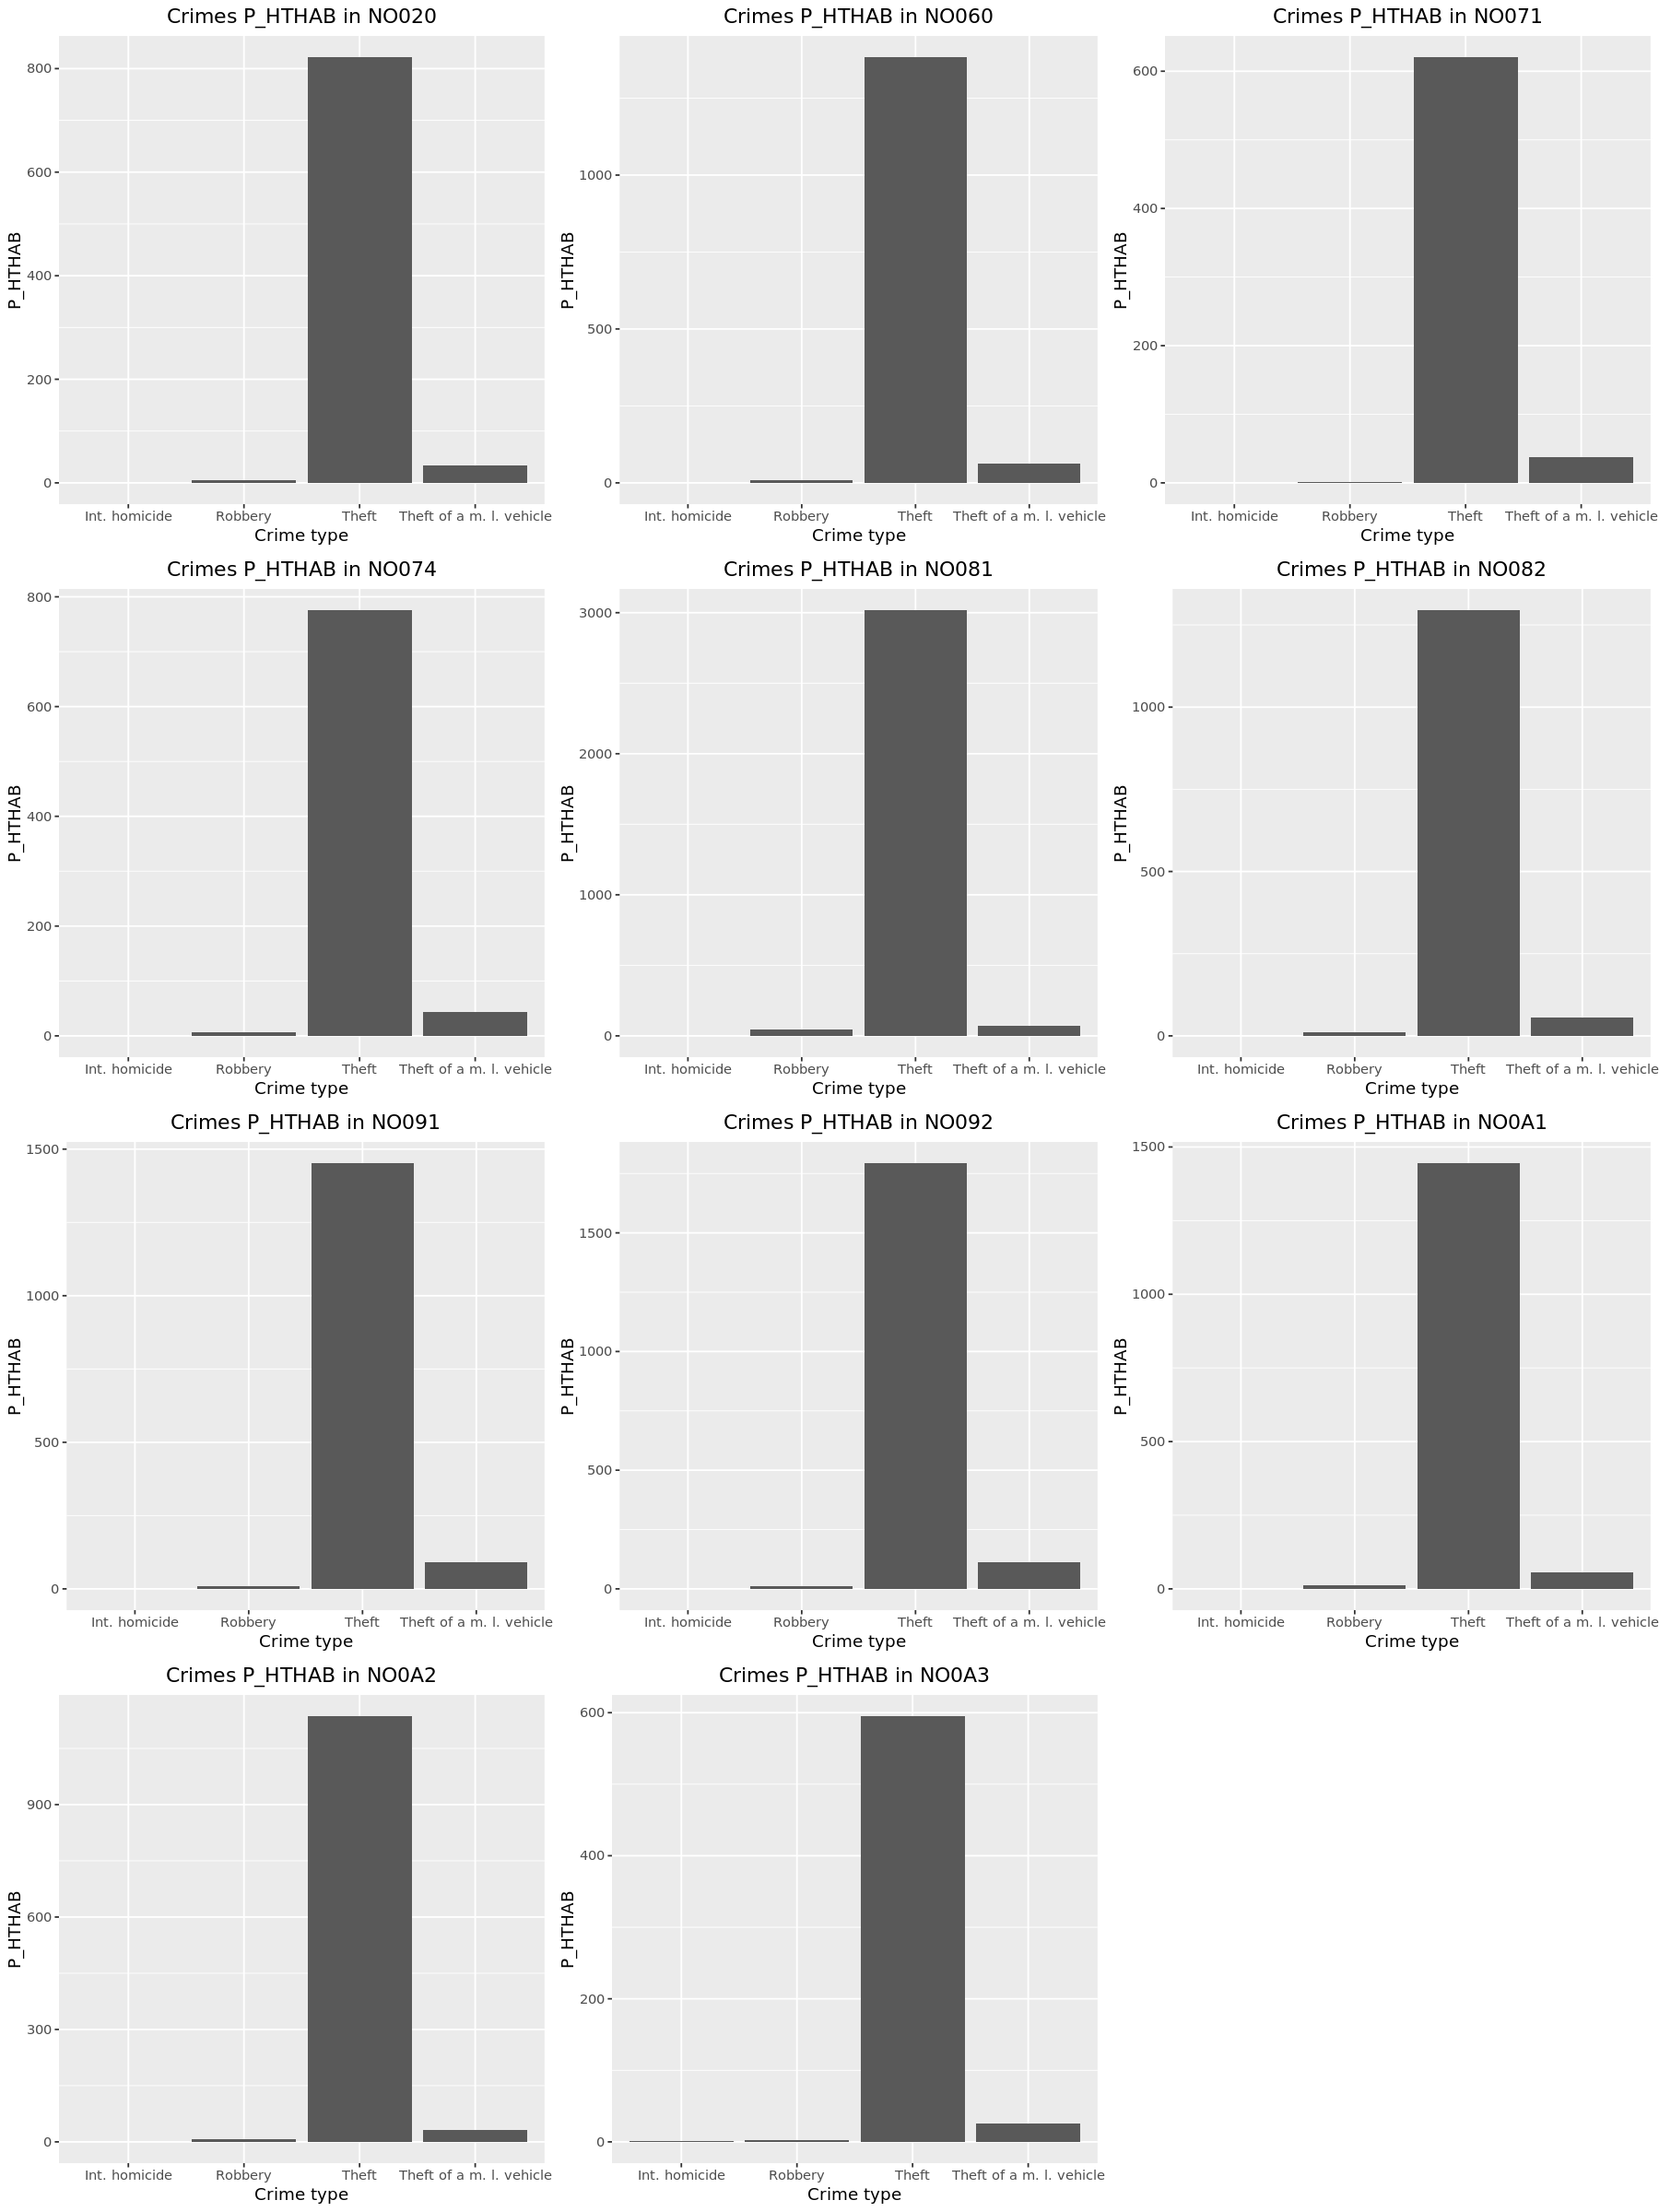

In [191]:
# Get all Norway NUTS3 region codes
norway_nuts3_regions = unique(data$geo)

# Prepare a function which plots a bar plot for each region
region_bar_plot <- function(region){
    # Select data by the region
    data_region = data[data$geo == region,]
    # Make a single bar plot
    plot <- ggplot( data = data_region, mapping = aes(x = iccs, y= values)) +
           geom_bar(stat='identity') +   # stat='identity' allows us to use y = values
           labs(title = paste('Crimes P_HTHAB in', region), x = 'Crime type', y = 'P_HTHAB') +
           theme(plot.title = element_text(hjust = 0.5))
    return(plot)
}

plots <- list()
for ( region in norway_nuts3_regions ) {
  # Create the plot
  region_plot <- region_bar_plot(region)
  # Add the plot to the list
  plots <- c(plots, list(region_plot))
}

# regulates the size of a plot https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html
options(repr.plot.width=15, repr.plot.height=20)

final_plot <- plot_grid(plotlist = plots, ncol=3)
final_plot

## Contingency table

## Hypotheses and tests

## References

1. ***Eurostat, Column description is located in 'About this dataset' section,*** https://ec.europa.eu/eurostat/databrowser/view/crim_gen_reg/default/table?lang=en&category=crim.crim_off
2. ***Eurostat, Dataset metadata (Completeness section)***, https://ec.europa.eu/eurostat/cache/metadata/en/crim_gen_reg_esms.htm
3. ***Eurostat, Dataset metadata (Unit of measure section)***, https://ec.europa.eu/eurostat/cache/metadata/en/crim_gen_reg_esms.htm
4. ***Eurostat, International classification od crime (codes)***, https://ec.europa.eu/eurostat/databrowser/view/crim_gen_reg/default/table?lang=en&category=crim.crim_off
5. e
6. a
7. b
8. c
9. d
10. e